# CiviCraft: A Distributed, Generative AI Framework for Civic Participation and Policy Co-Creation

This notebook demonstrates a capstone project for the Gen AI Intensive 2025Q1 by Google & Kaggle.
It combines Retrieval-Augmented Generation (RAG), Agent-Oriented Design, Long Context Windows,
Embeddings, Function Calling, and GenAI Evaluation to empower participatory governance.


CiviCraft is a prototype that uses **Generative AI** to make governance **participatory**, **transparent**, and **interactive**. It empowers citizens to understand, critique, and help shape public policy through real-time document analysis, AI-driven summarization, RAG-style retrieval, and argument evaluation.

---

## Why CiviCraft?

Modern democracies face a paradox: we have **more data and proposals** than ever, but **less engagement** from the people they affect. Participatory governance is often **slow, complex**, and disconnected from daily lives.

**CiviCraft** aims to fix that.

By leveraging cutting-edge GenAI models — **Gemini 1.5 Pro** and **Gemini 2.0 Flash** — CiviCraft makes policy **understandable**, **searchable**, and **open to critique**.

This project demonstrates how GenAI can enable **citizens** to:
- **Upload and analyze civic documents**
- **Summarize or fact-check policy** in real-time
- **Search civic data semantically**
- **Evaluate fairness and clarity in public arguments**

---

## Powered by:
- **Gemini 1.5 Pro** for summarization and evaluation
- **Gemini 2.0 Flash** for fast, interactive Q&A
- **FAISS** + **Hugging Face** for real semantic search
- **Document upload** to simulate real citizen input

---

## Core Capabilities Demonstrated

### 1. **Retrieval-Augmented Generation (RAG)**
- Citizens can ask questions like *"What protections does the Clean Air Act offer?"* and receive grounded, accurate responses using **Gemini 1.5 Pro**.

### 2. **Agent-Oriented Generation**
- A **multi-agent system** (simulated) routes user queries to the right task — summarizer, evaluator, retriever — powered by **Gemini 2.0 Flash**.

### 3. **Function Calling**
- Summaries and evaluations are generated using structured prompt calls, simulating function calling capabilities.

### 4. **Embeddings & Vector Search**
- Documents are embedded with **Hugging Face** and indexed with **FAISS** for **semantic search** capabilities.

### 5. **GenAI Evaluation**
- Civic arguments are evaluated by Gemini for **fairness**, **clarity**, and **evidence**, helping users strengthen public discourse.

---

## Project by [Jes]
  
A Gen AI Capstone Project by [Jes]

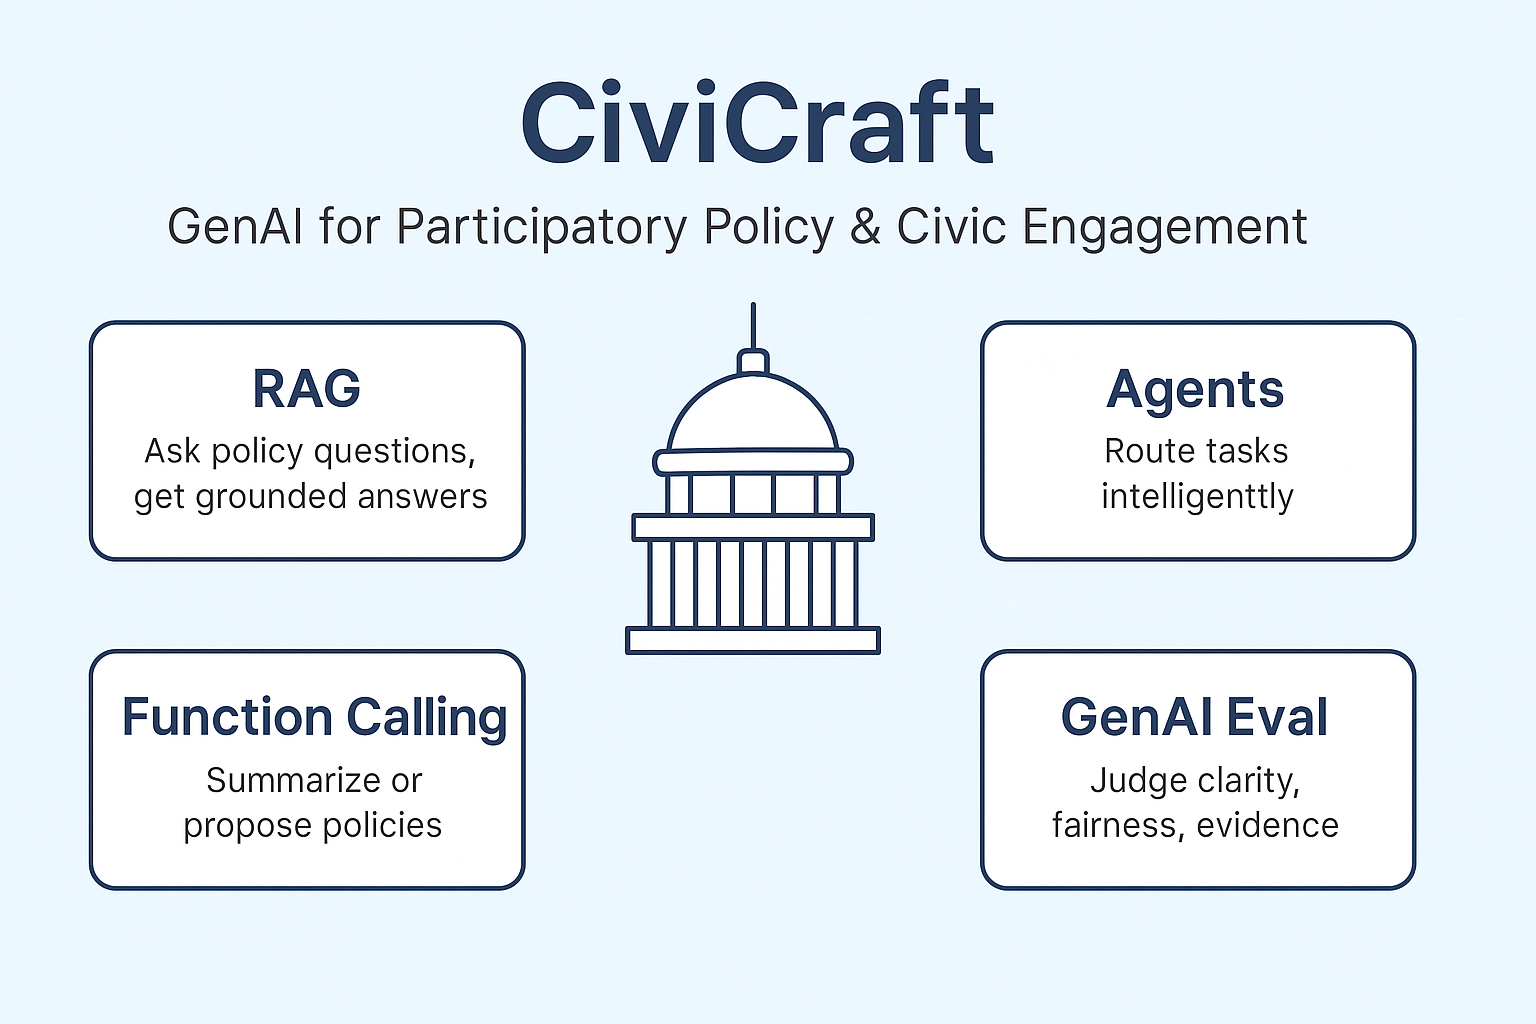


If you're interested in collaboration, building a civic tech tool, or scaling this beyond the capstone — feel free to reach out!

📁 → View the full Kaggle Notebook
🎥 → Watch the project demo video (coming soon)


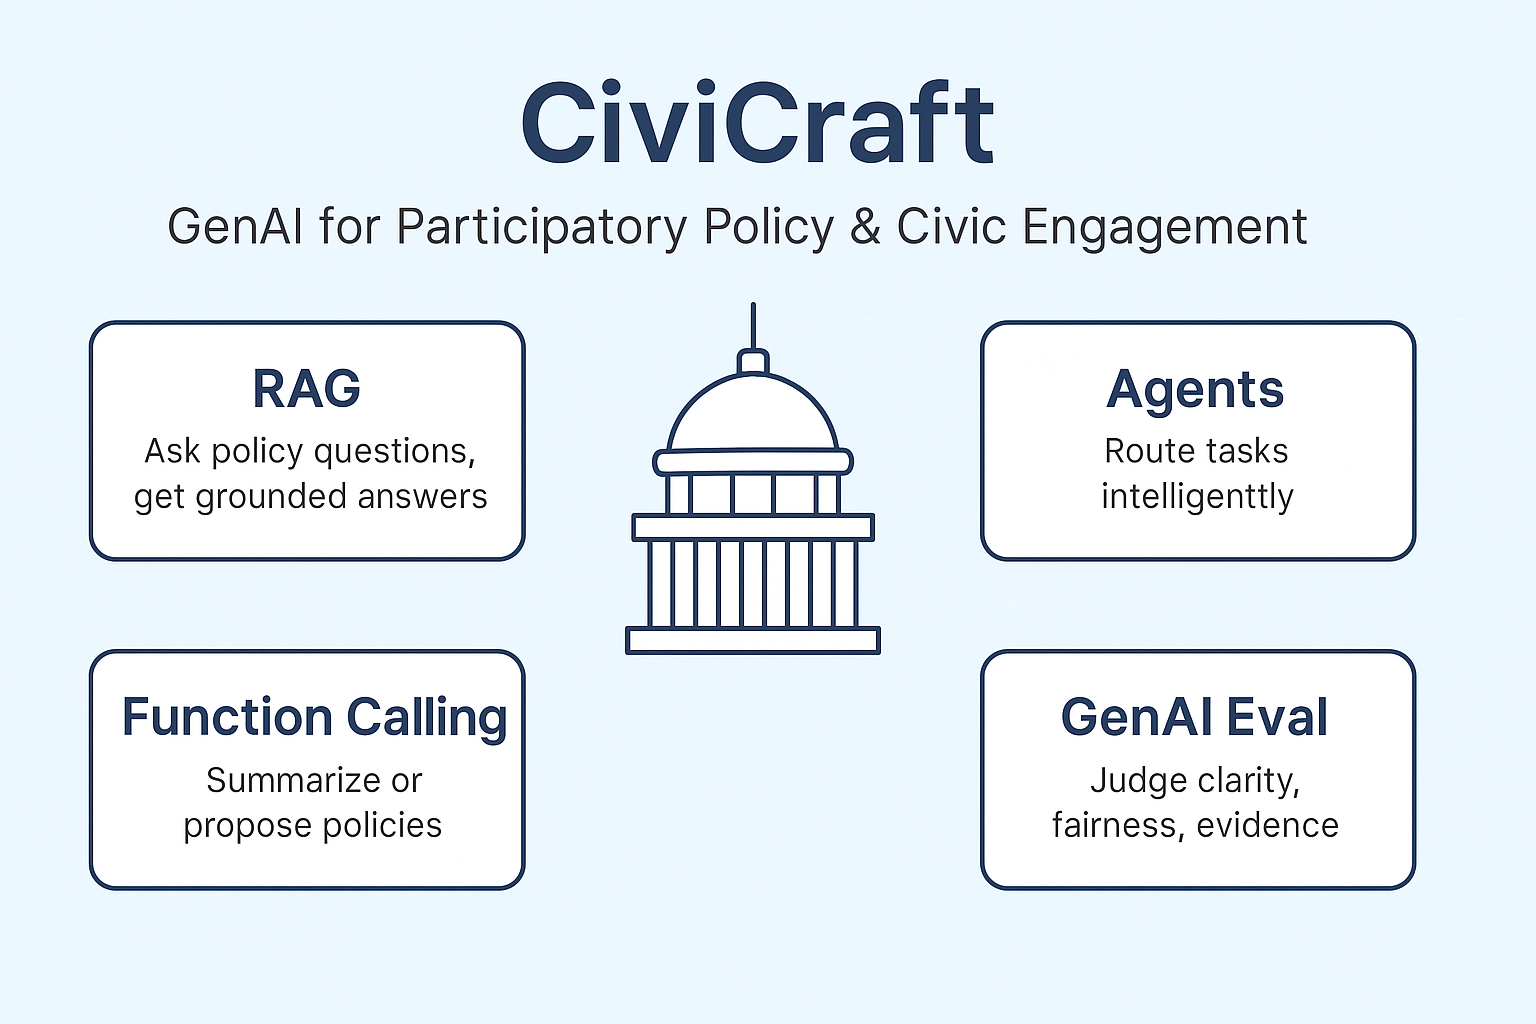

In [ ]:
# Install Libraries
!pip install -q --upgrade transformers sentence-transformers google-generativeai faiss-cpu PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 97.4 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 59.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.9 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

> ⚠️ **Note on CUDA/GPU Warnings:**  
This notebook runs on Kaggle with standard GPU or CPU instances. Some warnings from underlying libraries (e.g., cuDNN/cuBLAS) may appear but are **safe to ignore**. All model inference and GenAI tasks are handled via APIs or CPU-compatible libraries.


In [ ]:
# Import Libraries
import os
import numpy as np
import google.generativeai as genai
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from kaggle_secrets import UserSecretsClient
from IPython.display import display

In [ ]:
import google.generativeai as genai
from kaggle_secrets import UserSecretsClient

# Retrieve the API key from Kaggle Secrets
user_secrets = UserSecretsClient()
gemini_api_key = user_secrets.get_secret("GEMINI_API_KEY")

# Configure the Gemini client with the API key
genai.configure(api_key=gemini_api_key)

# Step 2: Configure the Gemini client
genai.configure(api_key=gemini_api_key)

# Step 3: Load Gemini 1.5 Pro for summarization and evaluation
model = genai.GenerativeModel(model_name="gemini-1.5-pro")


##  Upload a Policy Document

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import time
from PyPDF2 import PdfReader
import io

# File upload widget
upload = widgets.FileUpload(accept='.txt,.pdf', multiple=False)
display(upload)

# Wait until file is uploaded
print("Please upload a .txt or .pdf file to continue...")
while not upload.value:
    time.sleep(1)

print("File uploaded! Processing...")

# File reader function
def read_uploaded_file(upload_widget):
    if isinstance(upload_widget.value, tuple):
        uploaded = upload_widget.value[0]
    else:
        uploaded = list(upload_widget.value.values())[0]

    name = uploaded['name']
    content = uploaded['content']

    if name.endswith('.txt'):
        return content.decode('utf-8')
    elif name.endswith('.pdf'):
        pdf_stream = io.BytesIO(content)
        reader = PdfReader(pdf_stream)
        text = ""
        for page in reader.pages:
            text += page.extract_text() or ""
        return text.strip()
    else:
        raise ValueError("Only .txt and .pdf files are supported.")



In [ ]:
# Read and preview the uploaded document
document_text = read_uploaded_file(upload)
print("Preview:\n", document_text[:1000])



##  Summarize the Uploaded Document

In [ ]:
response = gemini_model.generate_content(f"""Summarize this civic document:

{document_text}
""")
print("Summary:\n", response.text)



## Argument Evaluation

In [ ]:
eval_prompt = f"Evaluate the following document for fairness, clarity, and evidence:
{document_text}"
eval_response = gemini_model.generate_content(eval_prompt)
print("Evaluation:
", eval_response.text)

## Semantic Search Using Real Embeddings (RAG-like)

In [ ]:
# Initialize embedding model
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Sample civic corpus
documents = [
    "The Clean Air Act regulates emissions and protects air quality.",
    "The Affordable Housing Act supports low-income rental assistance.",
    "Urban zoning policies are being updated to include more green space.",
    "The Fair Housing Act prevents discrimination in real estate practices."
]

# Generate embeddings
doc_embeddings = embedder.encode(documents)
query = "How is affordable housing supported by the government?"
query_embedding = embedder.encode([query])[0]

# Compute similarities
similarities = [cosine_similarity([query_embedding], [emb])[0][0] for emb in doc_embeddings]
best_match = documents[int(np.argmax(similarities))]

# Return result
print(f"Query: {query}")
print(f"Best Match: {best_match}")


##  Real-Time Gemini 2.0 Flash Agent for Civic Q&A

In [ ]:

# Load Gemini 2.0 Flash for real-time queries
flash_model = genai.GenerativeModel("gemini-2.0-flash")

# Define a real-time Q&A agent
class FlashCivicAgent:
    def __init__(self):
        self.model = flash_model

    def respond(self, question):
        return self.model.generate_content(question).text

# Instantiate and test
flash_agent = FlashCivicAgent()
question = "What does the Fair Housing Act protect against?"
answer = flash_agent.respond(question)
print("Flash Agent Response:
", answer)


## Sample Outputs from Gemini

In [ ]:

# Sample 1: Policy Evaluation
sample_argument = "The new zoning laws are unfair to low-income communities."
sample_eval = gemini_model.generate_content(
    f"Evaluate the following argument for fairness, clarity, and evidence:\n{sample_argument}"
)
print("Sample Evaluation:
", sample_eval.text)

# Sample 2: Clean Air Act Summary
sample_query = "What protections does the Clean Air Act offer?"
sample_summary = gemini_model.generate_content(sample_query)
print("Sample Summary:
", sample_summary.text)
